# steps 
## insights form datset
## Eda for missing values 
## eda for distribution of columns


In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
df1=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

In [3]:
df=df1.copy()

In [54]:
# Step 1: Convert date columns to datetime
# for col in ['DateAS', 'DateOS']:
#     df[col] = pd.to_datetime(df[col], errors='coerce')



In [55]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [38]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]
columns_with_missing

Index(['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateOS'],
      dtype='object')

In [39]:
df_num=df.select_dtypes(include=['number']).columns
df_obj=df.select_dtypes(include=['object']).columns
print(df_obj)
print(df_num)

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')
Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID',
       'OEMModelID', 'Processo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

                                    Missing Values  Percent (%)
SMode                                          981        0.981
CityID                                         623        0.623
RegionIdentifier                               559        0.559
IsGamer                                        559        0.559
InternalBatteryNumberOfCharges                 515        0.515
FirmwareManufacturerID                         376        0.376
FirmwareVersionID                              334        0.334
IsFlightsDisabled                              326        0.326
OEMModelID                                     228        0.228
OEMNameID                                      212        0.212
FirewallEnabled                                166        0.166
TotalPhysicalRAMMB                             151        0.151
IsAlwaysOnAlwaysConnectedCapable               134        0.134
OSInstallLanguageID                            113        0.113
SystemVolumeCapacityMB                  

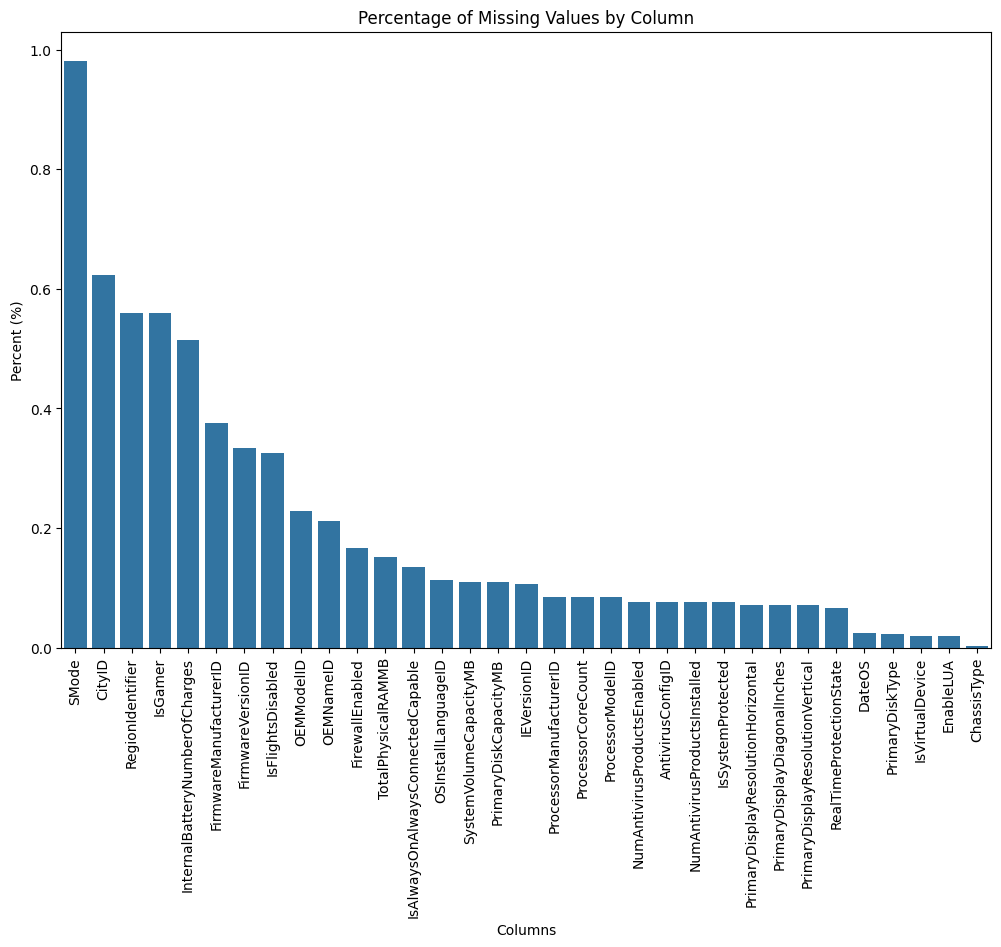

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Values': missing_counts, 
                           'Percent (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent (%)', ascending=False)

print(missing_df)

# Visualize missing data pattern
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df.index, y='Percent (%)', data=missing_df)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percent (%)')
plt.xlabel('Columns')
plt.show()


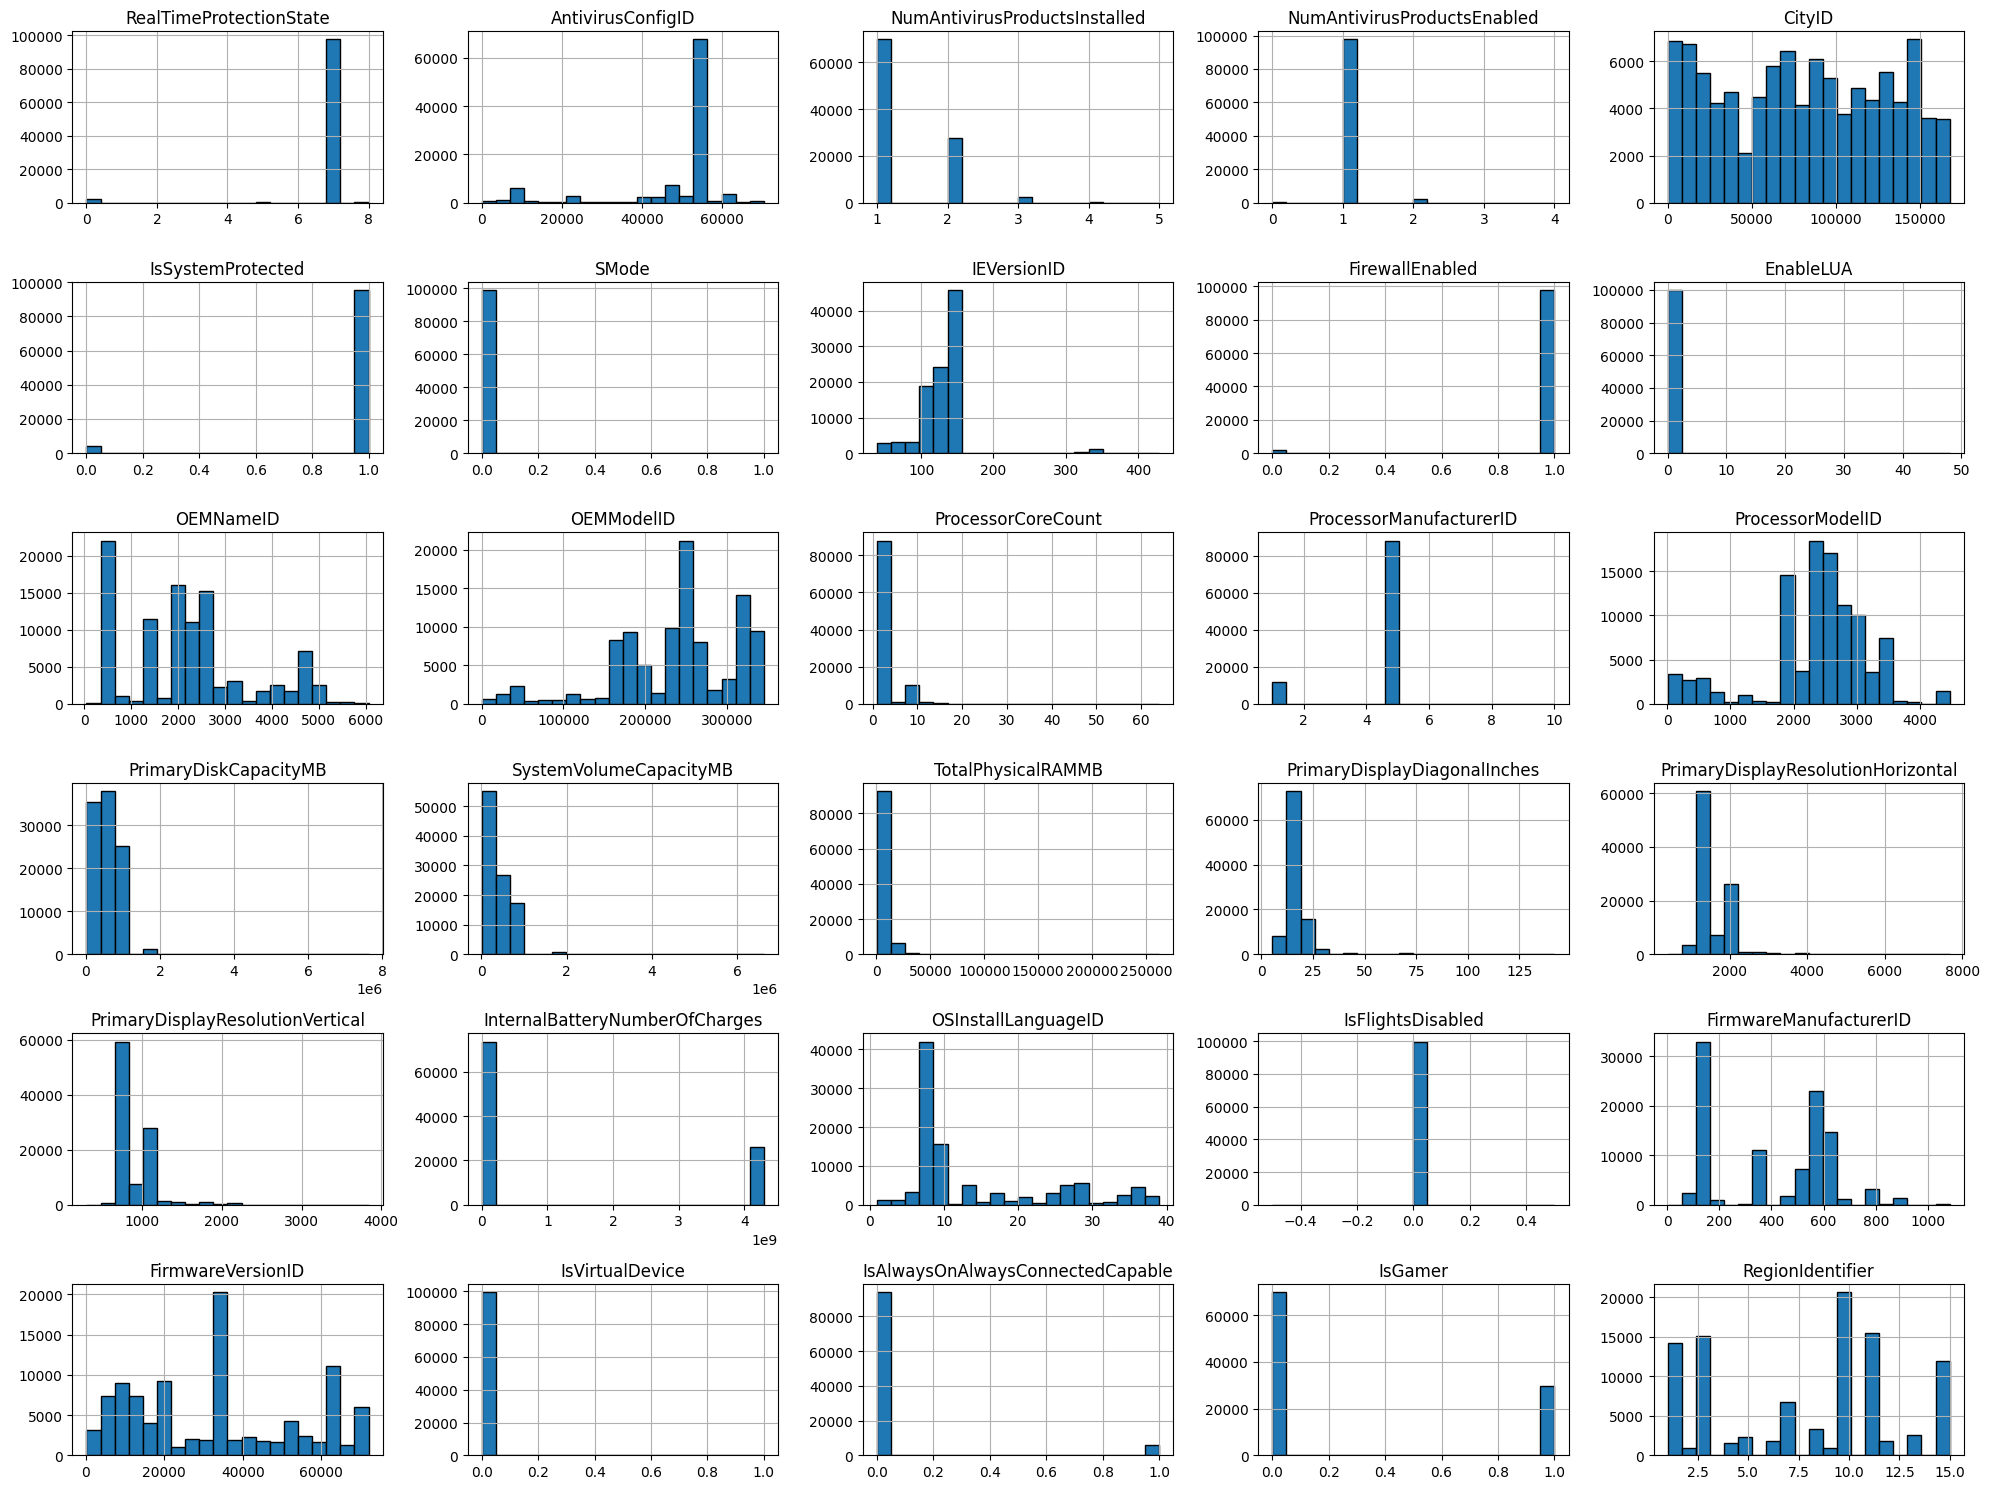

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateOS']

# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()



In [7]:
mode = [
    'SMode',
    'IsGamer',
    'InternalBatteryNumberOfCharges',
    'IsFlightsDisabled',
    'FirewallEnabled',
    'TotalPhysicalRAMMB',
    'IsAlwaysOnAlwaysConnectedCapable',
    'OSInstallLanguageID',
    'SystemVolumeCapacityMB',
    'IEVersionID',
    'ProcessorManufacturerID',
    'ProcessorCoreCount',
    'NumAntivirusProductsEnabled',
    'AntivirusConfigID',
    'NumAntivirusProductsInstalled',
    'IsSystemProtected',
    'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayDiagonalInches',
    'PrimaryDisplayResolutionVertical',
    'RealTimeProtectionState',
    'PrimaryDiskType',
    'IsVirtualDevice',
    'EnableLUA',
    'ChassisType'
]


In [8]:
knn=['CityID','RegionIdentifier','FirmwareManufacturerID','FirmwareVersionID','OEMModelID','OEMNameID','PrimaryDiskCapacityMB','ProcessorModelID','DateOS']

/tmp/ipykernel_43685/4095450170.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_43685/4095450170.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_43685/4095450170.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
/tmp/ipykernel_43685/4095450170.py:29: FutureWarning: 

Passing `palette` without assign

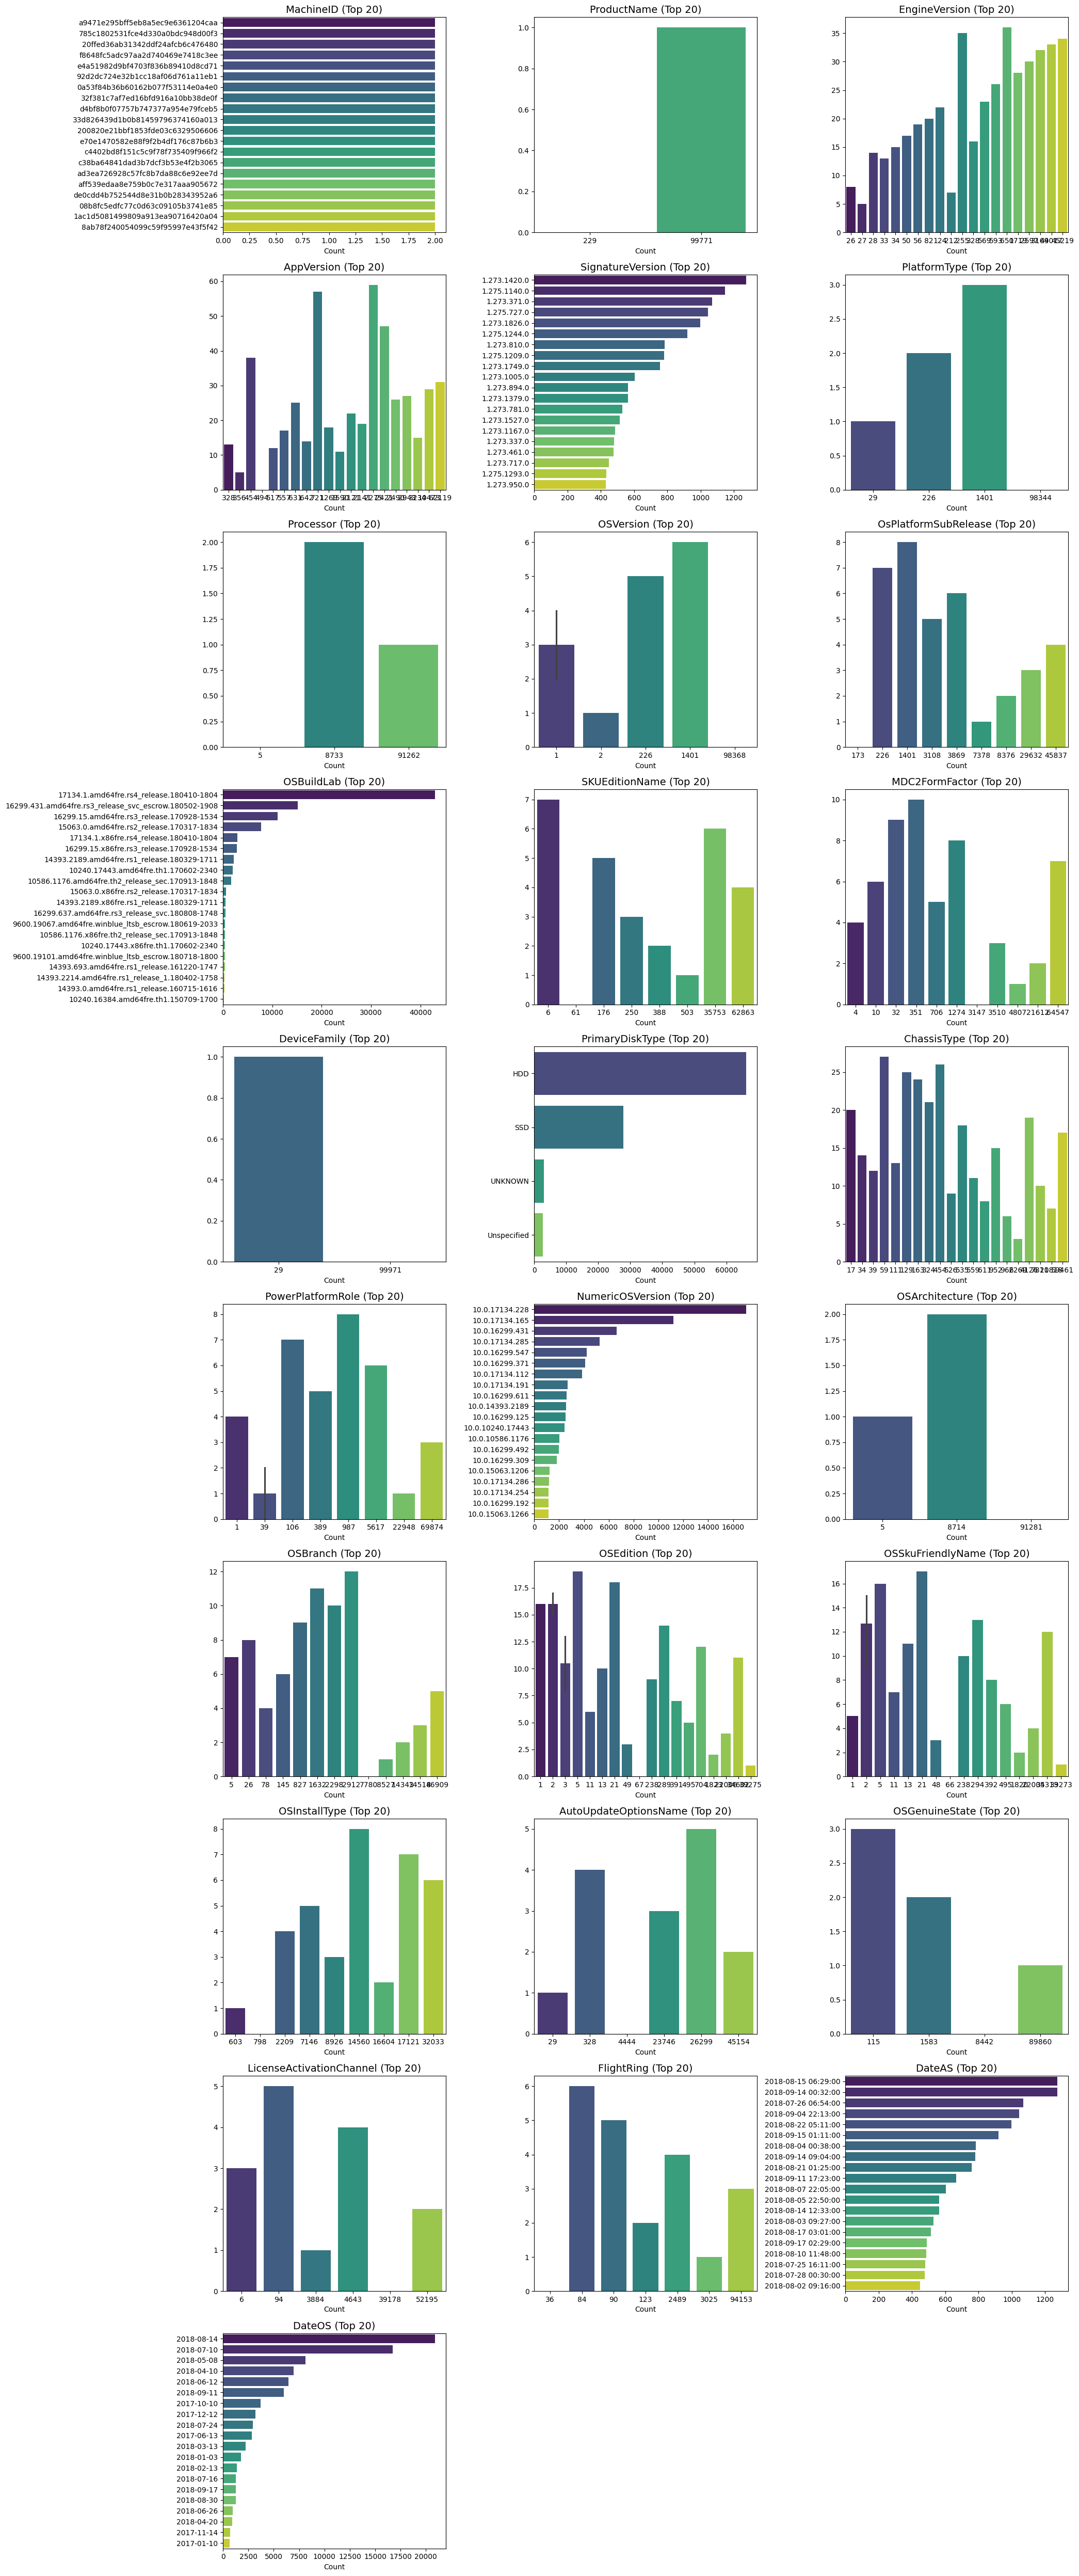

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your categorical columns list (example subset; replace with your actual categorical columns)
cat_columns = ['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
               'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
               'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
               'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType',
               'ChassisType', 'PowerPlatformRole', 'NumericOSVersion',
               'OSArchitecture', 'OSBranch', 'OSEdition',
               'OSSkuFriendlyName', 'OSInstallType',
               'AutoUpdateOptionsName', 'OSGenuineState',
               'LicenseActivationChannel','FlightRing','DateAS','DateOS']

# Set number of columns per row for subplots
n_cols = 3
n_rows = (len(cat_columns) + n_cols - 1) // n_cols

# Set figure size (adjust as needed)
plt.figure(figsize=(n_cols * 7, n_rows * 5))

for idx, col in enumerate(cat_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    
    # Get top 10 categories for clarity
    top_categories = df[col].value_counts().nlargest(20)
    
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
    
    plt.title(f'{col} (Top 20)', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [46]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[knn] = imputer.fit_transform(df[knn])
mode_imputer = SimpleImputer(strategy='most_frequent')
df[mode] = mode_imputer.fit_transform(df[mode])




In [47]:
import pandas as pd

# Convert each column to numeric, coercing invalid values to NaN
for col in df_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')


        Missing Values  Percent (%)
DateOS              24        0.024


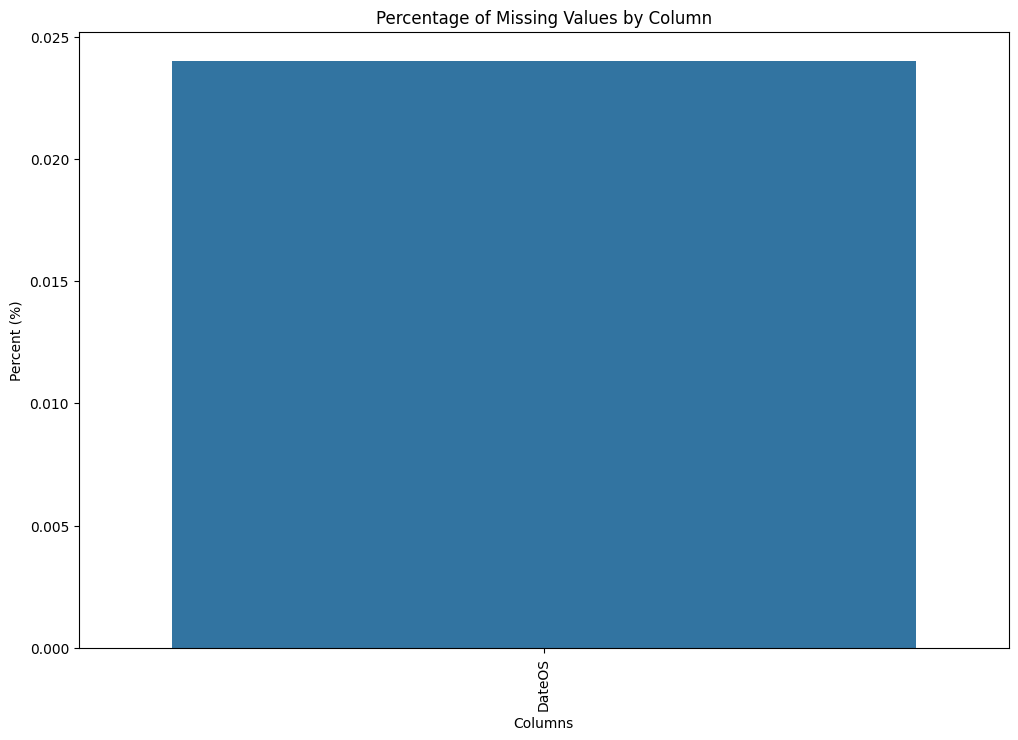

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count and percentage of missing values per column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Create a DataFrame for better visualization
missing_df = pd.DataFrame({'Missing Values': missing_counts, 
                           'Percent (%)': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent (%)', ascending=False)

print(missing_df)

# Visualize missing data pattern
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_df.index, y='Percent (%)', data=missing_df)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percent (%)')
plt.xlabel('Columns')
plt.show()


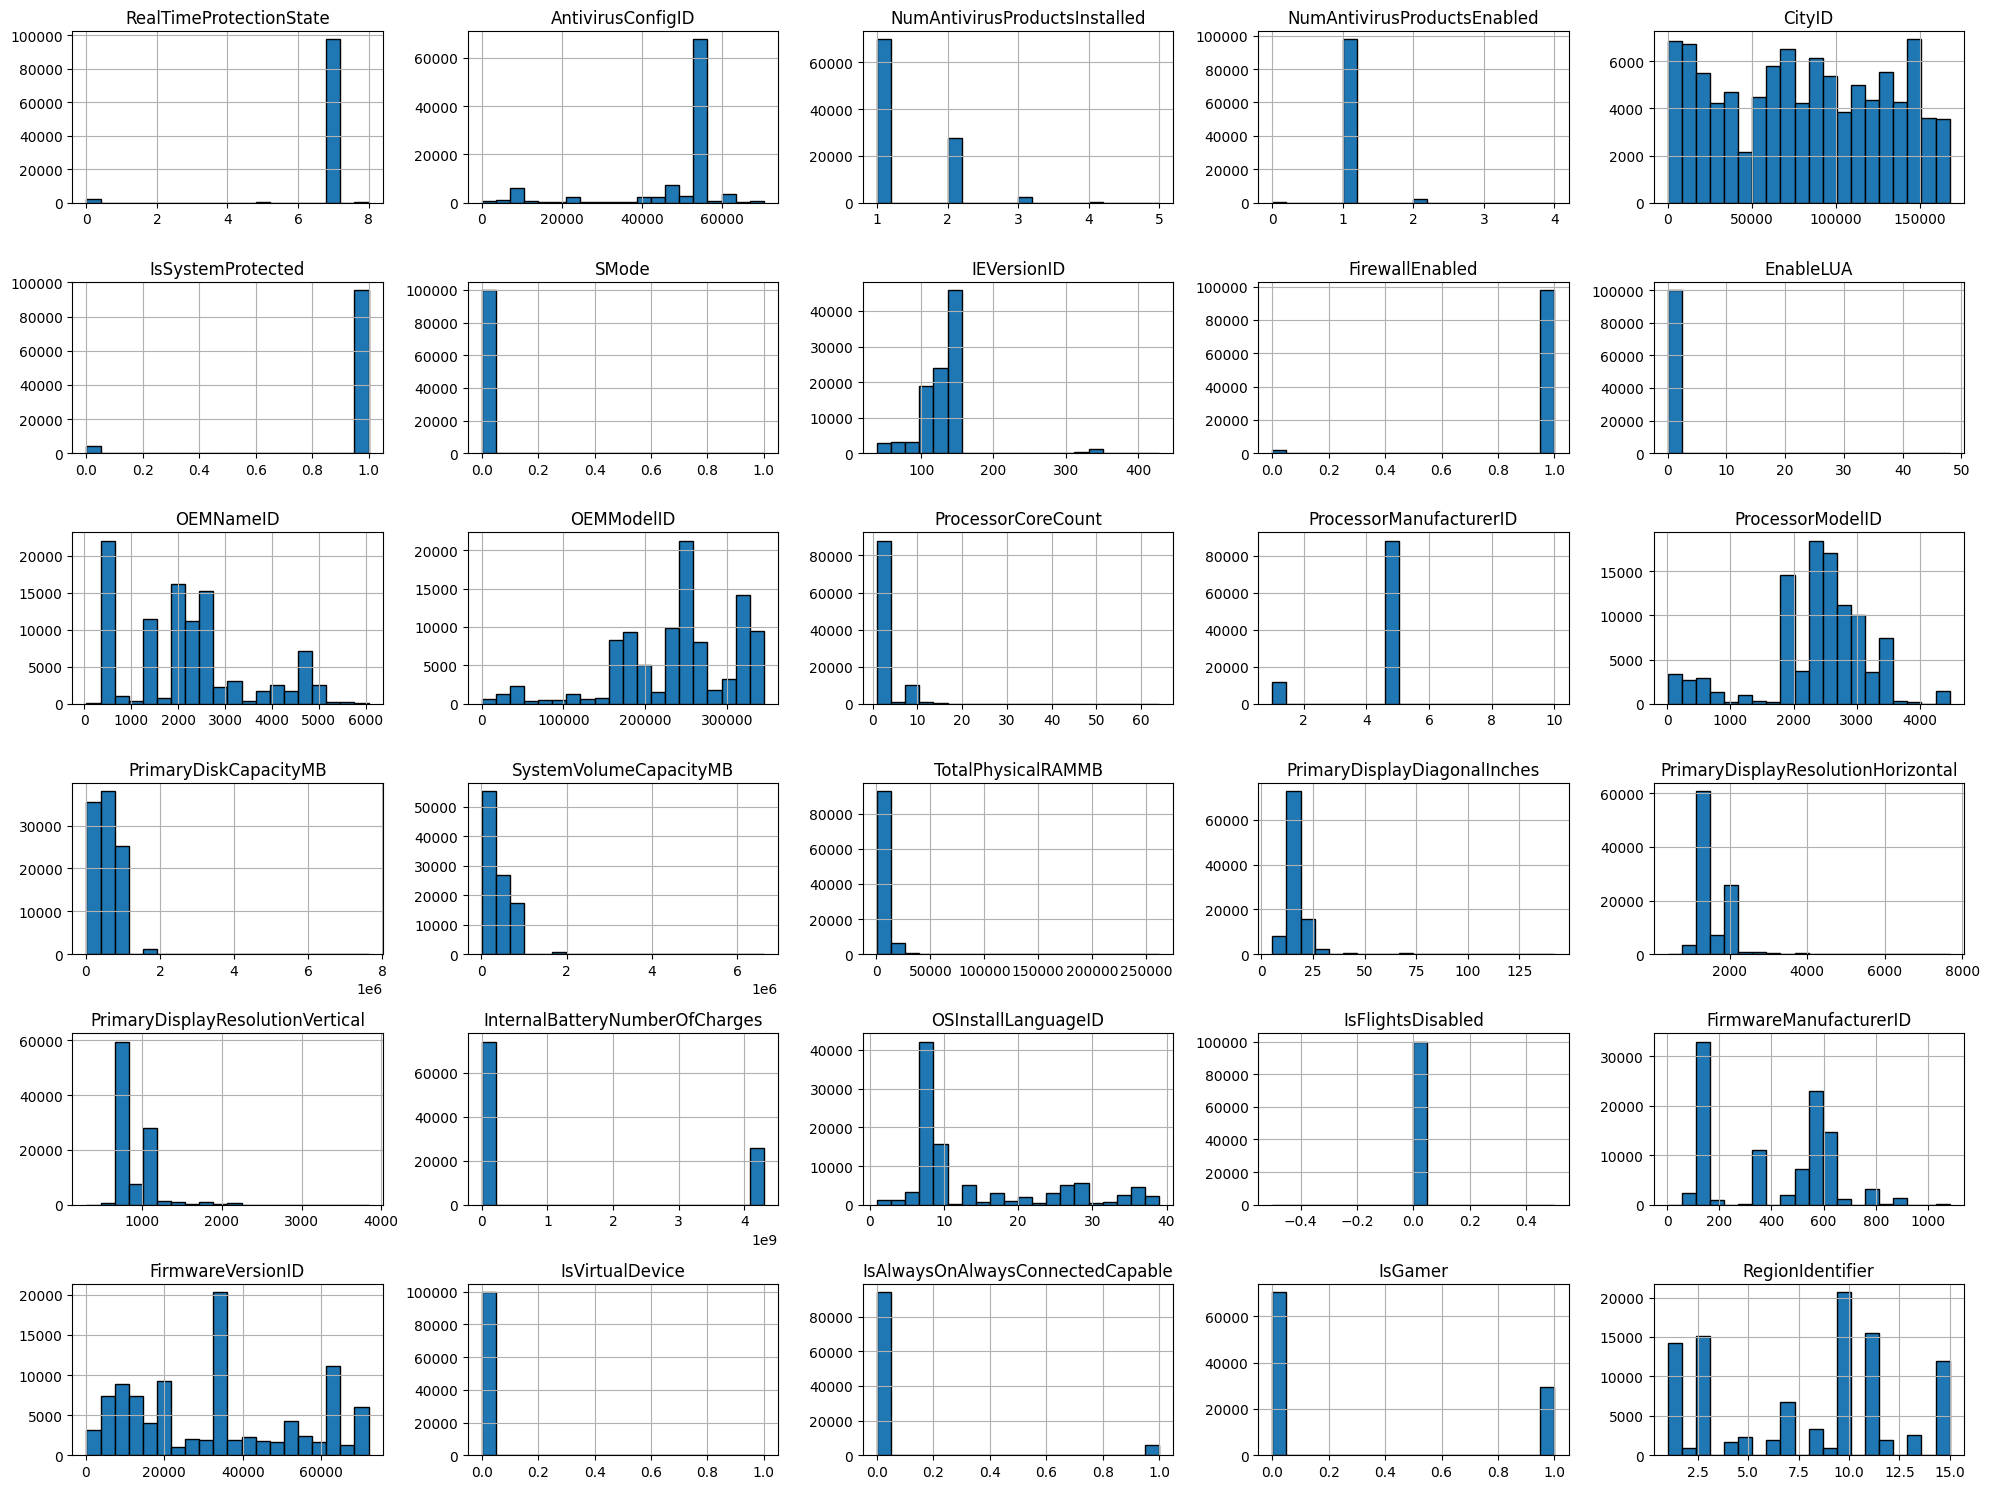

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateOS']

# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [9]:
binary=['ProductName','DeviceFamily']
nominal=['SKUEditionName','MDC2FormFactor','DeviceFamily','ChassisType','PowerPlatformRole','OSArchitecture','OSBranch','OSEdition','OSSkuFriendlyName','OSInstallType','AutoUpdateOptionsName','OSGenuineState','LicenseActivationChannel','FlightRing','PrimaryDiskType']
ordinal=['EngineVersion','AppVersion','PlatformType', 'Processor','OSVersion','OsPlatformSubRelease']
ignore=['MachineID','SignatureVersion','OSBuildLab','NumericalOSVersion', 'DateOS','DateAS']

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [17]:
label_encoder = LabelEncoder()
df[binary] = df[binary].apply(label_encoder.fit_transform)

# Perform label encoding for nominal columns
nominal_encoder = LabelEncoder()
df[nominal] = df[nominal].apply(nominal_encoder.fit_transform)

# Perform ordinal encoding for ordinal columns
ordinal_encoder = OrdinalEncoder()
df[ordinal] = ordinal_encoder.fit_transform(df[ordinal])

In [58]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,1,34.0,31.0,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,0.0,2.0,0.0,14393,768,1.0,14393.2214.x86fre.rs1_release_1.180402-1758,4,1.0,0,0.0,98.0,1.0,1.0,10,0,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,17,8.0,800.0,1280.0,6,1.420000e+02,10.0.14393.2214,2,0,14393,2214,1,1,7,5.0,26,5,0,1,2,0.0,3,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,1,33.0,31.0,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,0.0,1.0,0.0,17134,256,4.0,17134.1.amd64fre.rs4_release.180410-1804,6,1.0,0,0.0,137.0,1.0,1.0,0,0,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,3,19.4,1600.0,900.0,1,4.294967e+09,10.0.17134.228,0,5,17134,228,11,12,6,9.0,34,2,0,1,0,0.0,3,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,1,34.0,31.0,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,0.0,1.0,0.0,17134,768,4.0,17134.1.amd64fre.rs4_release.180410-1804,4,1.0,0,0.0,137.0,1.0,1.0,2,0,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,7,24.0,1920.0,1080.0,1,4.294967e+09,10.0.17134.285,0,5,17134,285,1,1,5,5.0,26,2,0,1,1,0.0,3,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,1,34.0,17.0,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,0.0,1.0,0.0,15063,768,2.0,15063.0.amd64fre.rs2_release.170317-1834,4,1.0,0,0.0,108.0,1.0,1.0,7,0,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,17,15.5,1366.0,768.0,3,0.000000e+00,10.0.15063.850,0,1,15063,850,1,1,8,7.0,30,5,0,1,0,0.0,3,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,1,34.0,22.0,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,0.0,2.0,0.0,17134,256,4.0,17134.1.x86fre.rs4_release.180410-1804,6,1.0,0,0.0,137.0,1.0,1.0,2,0,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,7,20.0,1600.0,900.0,1,4.294967e+09,10.0.17134.285,2,5,17134,285,11,12,6,37.0,158,2,0,1,2,0.0,3,628.0,13224.0,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


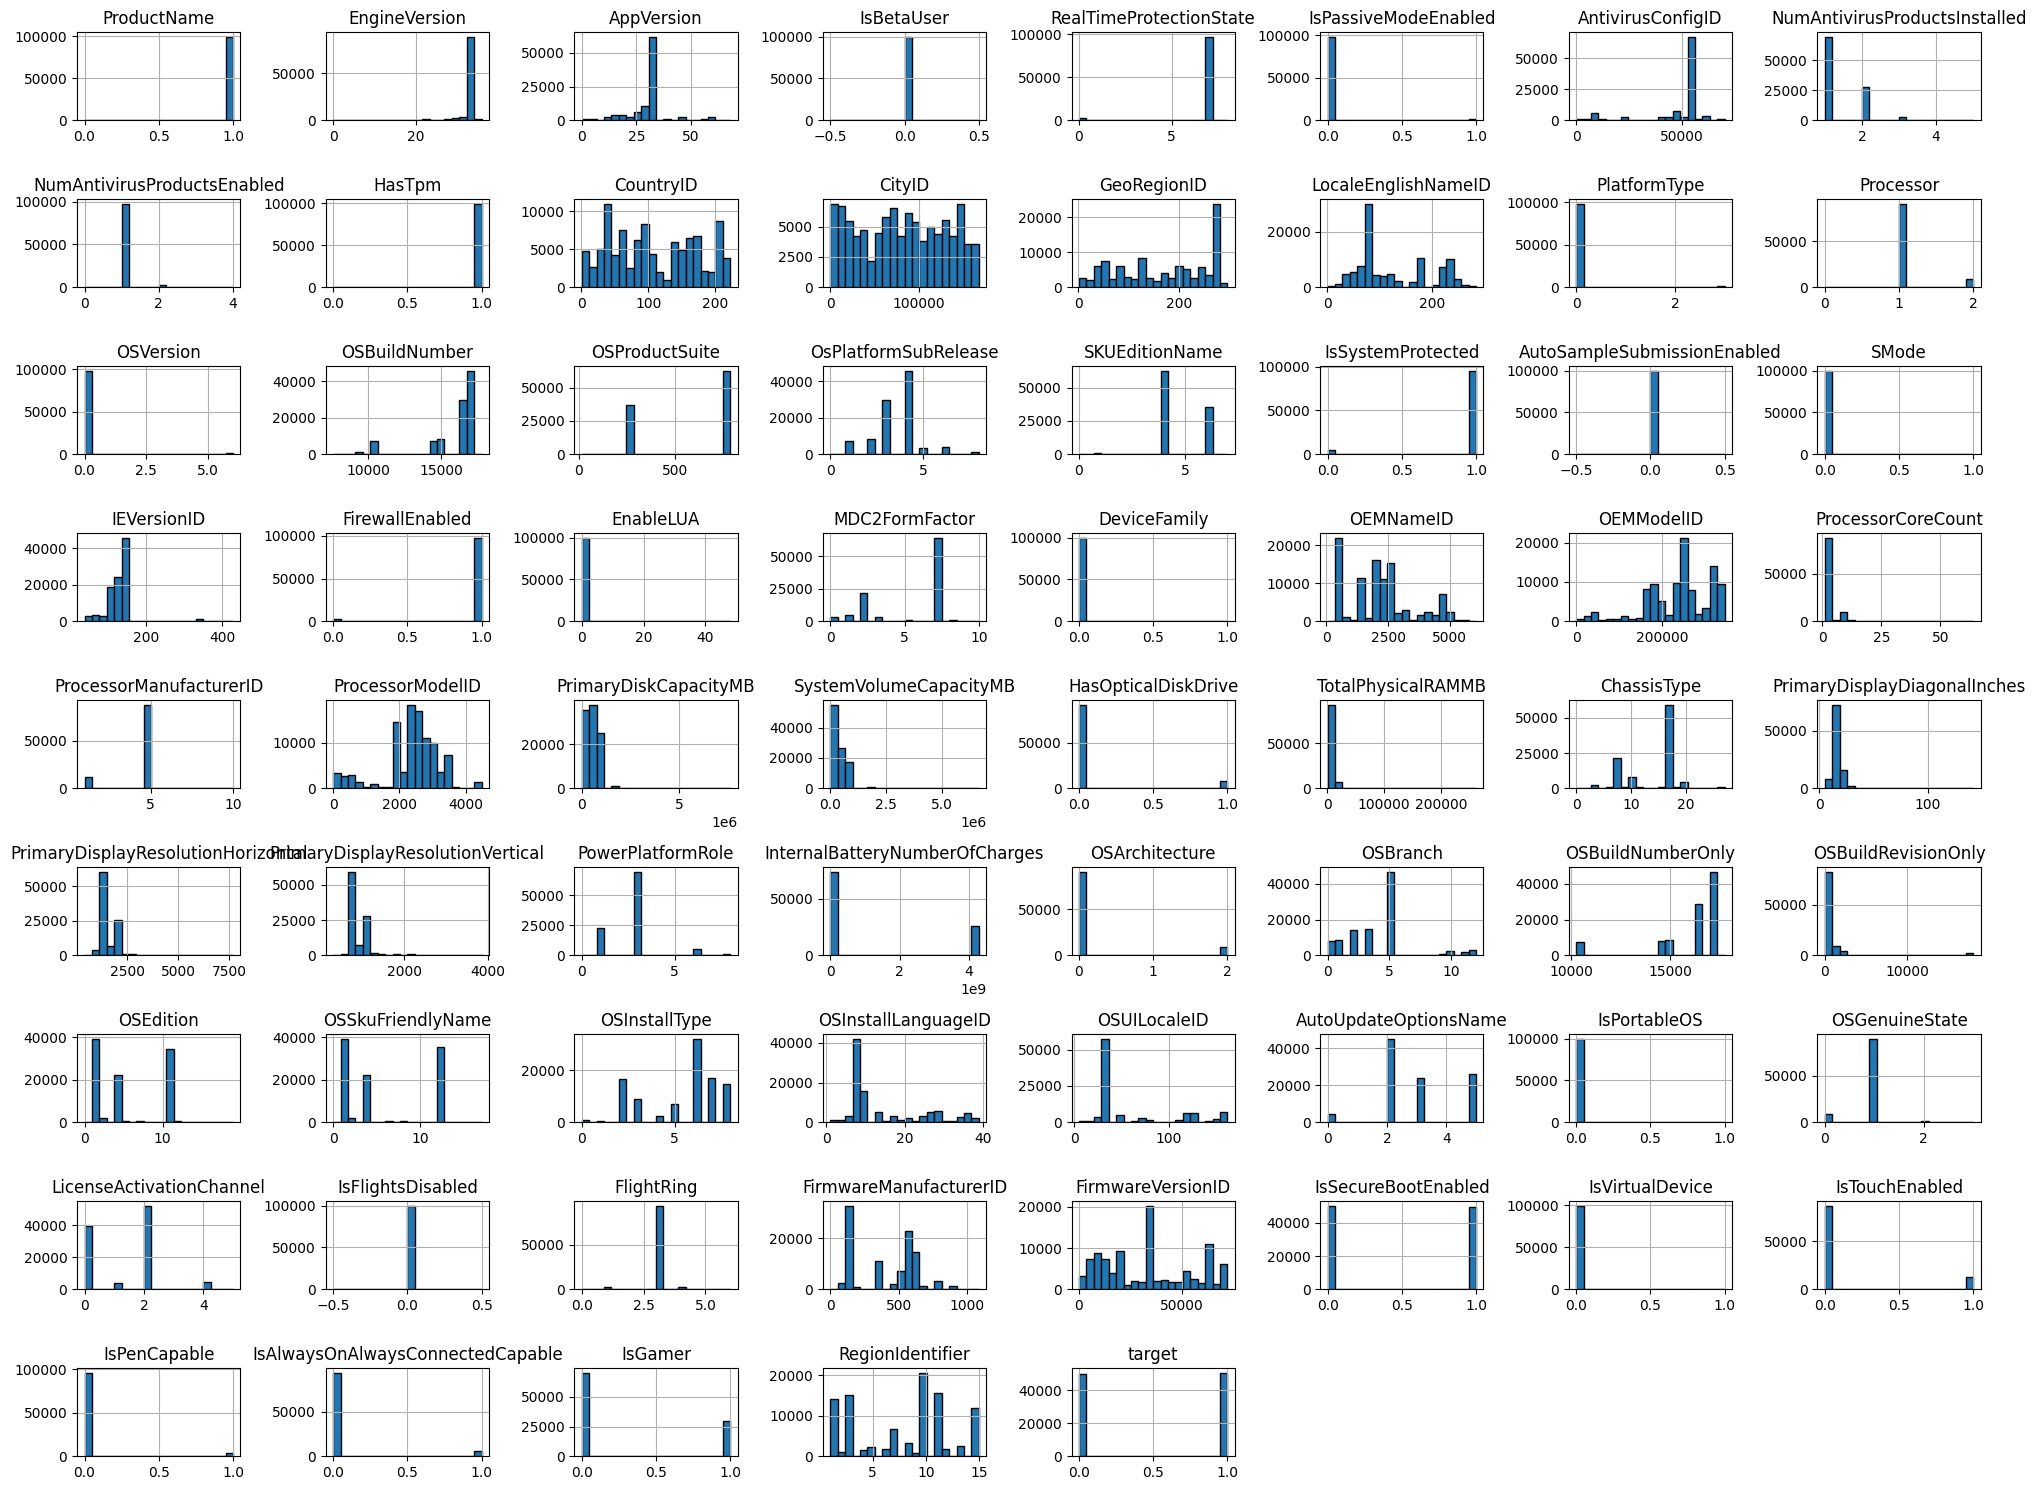

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture',
       'OSBranch', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition',
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'OSUILocaleID', 'AutoUpdateOptionsName', 'IsPortableOS',
       'OSGenuineState', 'LicenseActivationChannel', 'IsFlightsDisabled',
       'FlightRing', 'FirmwareManufacturerID', 'FirmwareVersionID',
       'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled',
       'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer',
       'RegionIdentifier', 'DateAS', 'DateOS', 'target']
# Plot histograms for all specified columns
df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [61]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [14]:
mode = [
    'SMode','IsGamer','InternalBatteryNumberOfCharges','IsFlightsDisabled','FirewallEnabled', 'TotalPhysicalRAMMB','IsAlwaysOnAlwaysConnectedCapable','OSInstallLanguageID','SystemVolumeCapacityMB','IEVersionID','ProcessorManufacturerID','ProcessorCoreCount','NumAntivirusProductsEnabled','AntivirusConfigID','NumAntivirusProductsInstalled','IsSystemProtected','PrimaryDisplayResolutionHorizontal','PrimaryDisplayDiagonalInches','PrimaryDisplayResolutionVertical','RealTimeProtectionState','PrimaryDiskType','IsVirtualDevice','EnableLUA','ChassisType'
]



knn=['CityID','RegionIdentifier','FirmwareManufacturerID','FirmwareVersionID','OEMModelID','OEMNameID','PrimaryDiskCapacityMB','ProcessorModelID','DateOS']



binary=['ProductName','DeviceFamily']
nominal=['SKUEditionName','MDC2FormFactor','DeviceFamily','ChassisType','PowerPlatformRole','OSArchitecture','OSBranch','OSEdition','OSSkuFriendlyName','OSInstallType','AutoUpdateOptionsName','OSGenuineState','LicenseActivationChannel','FlightRing','PrimaryDiskType']
ordinal=['EngineVersion','AppVersion','PlatformType', 'Processor','OSVersion','OsPlatformSubRelease']
ignore=['MachineID','SignatureVersion','OSBuildLab','NumericalOSVersion', 'DateOS','DateAS']

df.drop(columns=ignore, inplace=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(n_neighbors=5), knn),  # KNN imputation for numerical columns
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), mode),  # Mode imputation for categorical columns
        ('label_encoder_binary', LabelEncoder(), binary),  # Label encoding for binary columns
        ('label_encoder_nominal', LabelEncoder(), nominal),  # Label encoding for nominal columns
        ('ordinal_encoder', OrdinalEncoder(), ordinal)  # Ordinal encoding for ordinal columns
    ],
    remainder='passthrough'  # Keep other columns as they are
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the DataFrame using the pipeline
processed_df = pipeline.fit_transform(df)

KeyError: "['NumericalOSVersion'] not found in axis"

In [15]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define column categories
mode = [
    'SMode', 'IsGamer', 'InternalBatteryNumberOfCharges', 'IsFlightsDisabled',
    'FirewallEnabled', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable',
    'OSInstallLanguageID', 'SystemVolumeCapacityMB', 'IEVersionID', 'ProcessorManufacturerID',
    'ProcessorCoreCount', 'NumAntivirusProductsEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'IsSystemProtected', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical',
    'RealTimeProtectionState', 'PrimaryDiskType', 'IsVirtualDevice', 'EnableLUA', 'ChassisType'
]

knn = [
    'CityID', 'RegionIdentifier', 'FirmwareManufacturerID', 'FirmwareVersionID',
    'OEMModelID', 'OEMNameID', 'PrimaryDiskCapacityMB', 'ProcessorModelID'
]

binary = ['ProductName', 'DeviceFamily']

nominal = [
    'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'ChassisType', 'PowerPlatformRole',
    'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
    'FlightRing', 'PrimaryDiskType'
]

ordinal = ['EngineVersion', 'AppVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease']

ignore = ['MachineID', 'SignatureVersion', 'OSBuildLab', 'NumericalOSVersion', 'DateAS', 'DateOS']

# Drop ignored columns
df = df.drop(columns=ignore, errors='ignore')  # Use errors='ignore' to avoid KeyErrors

# Define column transformer with correct preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(n_neighbors=5), knn),  # KNN imputation for numerical columns
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), mode),  # Mode imputation for categorical columns
        ('binary_encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), binary),  # Use OneHotEncoder for binary
        ('nominal_encoder', OneHotEncoder(handle_unknown='ignore'), nominal),  # OneHotEncoder for nominal categories
        ('ordinal_encoder', OrdinalEncoder(), ordinal)  # Ordinal encoding for ordinal categories
    ],
    remainder='passthrough'  # Keep other columns as they are
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform
processed_data = pipeline.fit_transform(df)

# **Extract Transformed Column Names**
def get_feature_names(column_transformer, original_feature_names):
    output_features = []
    for name, transformer, features in column_transformer.transformers_:
        if transformer == 'drop':
            continue
        elif hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(features))
        else:
            output_features.extend(features)
    return output_features

# Get final column names
new_col_names = get_feature_names(preprocessor, df.columns)

# Convert back to DataFrame
processed_df = pd.DataFrame(processed_data, columns=new_col_names)

print(processed_df.head()) 

ValueError: Shape of passed values is (3, 6), indices imply (3, 5)

In [20]:
processed_df.head()

,SMode,IsGamer,InternalBatteryNumberOfCharges,IsFlightsDisabled,FirewallEnabled,TotalPhysicalRAMMB,IsAlwaysOnAlwaysConnectedCapable,OSInstallLanguageID,SystemVolumeCapacityMB,IEVersionID,ProcessorManufacturerID,ProcessorCoreCount,NumAntivirusProductsEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,IsSystemProtected,PrimaryDisplayResolutionHorizontal,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionVertical,RealTimeProtectionState,PrimaryDiskType,IsVirtualDevice,EnableLUA,ChassisType,CityID,RegionIdentifier,FirmwareManufacturerID,FirmwareVersionID,OEMModelID,OEMNameID,PrimaryDiskCapacityMB,ProcessorModelID,ProductName,DeviceFamily,SKUEditionName,MDC2FormFactor,DeviceFamily,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,PrimaryDiskType,EngineVersion,AppVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,IsBetaUser,IsPassiveModeEnabled,HasTpm,CountryID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,AutoSampleSubmissionEnabled,HasOpticalDiskDrive,NumericOSVersion,OSBuildNumberOnly,OSBuildRevisionOnly,OSUILocaleID,IsPortableOS,IsSecureBootEnabled,IsTouchEnabled,IsPenCapable,target
0,11836.0,20.0,226.0,4127.0,15111.0,54.0,8.0,618.0,0.0,0.0,142.0,0.0,1.0,4.0,1.0,4.0,30.0,40.0,2.0,3.0,1.0,1497.0,0.0,1.0,5.0,13.0,78.0,4.0,1.0,0.0,1.0,17.0,1.0,0.0,4.0,10.0,0.0,17.0,6.0,2.0,0.0,1.0,1.0,7.0,5.0,1.0,2.0,3.0,1.0,34.0,31.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,50.0,79.0,83.0,4.0,5.0,0.0,0.0,93.0,2.0,149.0,10.0,0.0,0.0,1.0,0.0,0.0
1,11053.0,40.0,282.0,7578.0,619.0,506.0,432.0,908.0,0.0,0.0,1759.0,0.0,1.0,60.0,0.0,8.0,45026.0,50.0,2.0,3.0,1.0,1497.0,0.0,1.0,49.0,123.0,34.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,6.0,0.0,0.0,3.0,1.0,0.0,5.0,11.0,12.0,6.0,2.0,1.0,0.0,3.0,0.0,33.0,31.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,140.0,138.0,157.0,7.0,1.0,0.0,1.0,194.0,7.0,40.0,16.0,0.0,1.0,0.0,0.0,1.0
2,3992.0,20.0,23.0,1562.0,10296.0,580.0,196.0,1098.0,0.0,1.0,1759.0,0.0,1.0,93.0,0.0,4.0,17335.0,50.0,2.0,3.0,1.0,1497.0,0.0,1.0,74.0,169.0,70.0,4.0,1.0,0.0,1.0,7.0,1.0,0.0,4.0,2.0,0.0,7.0,1.0,0.0,5.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,1.0,34.0,31.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,50.0,79.0,83.0,7.0,5.0,0.0,1.0,196.0,7.0,45.0,10.0,0.0,0.0,0.0,0.0,1.0
3,1884.0,50.0,252.0,5447.0,8596.0,337.0,464.0,1452.0,0.0,0.0,0.0,0.0,1.0,93.0,0.0,6.0,45837.0,45.0,2.0,3.0,1.0,1194.0,1.0,1.0,35.0,85.0,21.0,4.0,0.0,0.0,1.0,17.0,1.0,0.0,4.0,7.0,0.0,17.0,3.0,0.0,1.0,1.0,1.0,8.0,5.0,1.0,0.0,3.0,0.0,34.0,17.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,67.0,223.0,57.0,5.0,5.0,0.0,0.0,155.0,4.0,96.0,13.0,0.0,1.0,0.0,0.0,1.0
4,11599.0,25.0,282.0,2406.0,9530.0,506.0,245.0,1699.0,0.0,1.0,1759.0,0.0,1.0,21.0,0.0,36.0,1804.0,50.0,2.0,1.0,1.0,947.0,1.0,1.0,49.0,129.0,34.0,4.0,0.0,0.0,1.0,7.0,1.0,0.0,6.0,2.0,0.0,7.0,1.0,2.0,5.0,11.0,12.0,6.0,2.0,1.0,2.0,3.0,0.0,34.0,22.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,42.0,44.0,29.0,7.0,1.0,0.0,0.0,196.0,7.0,45.0,59.0,0.0,0.0,0.0,0.0,0.0


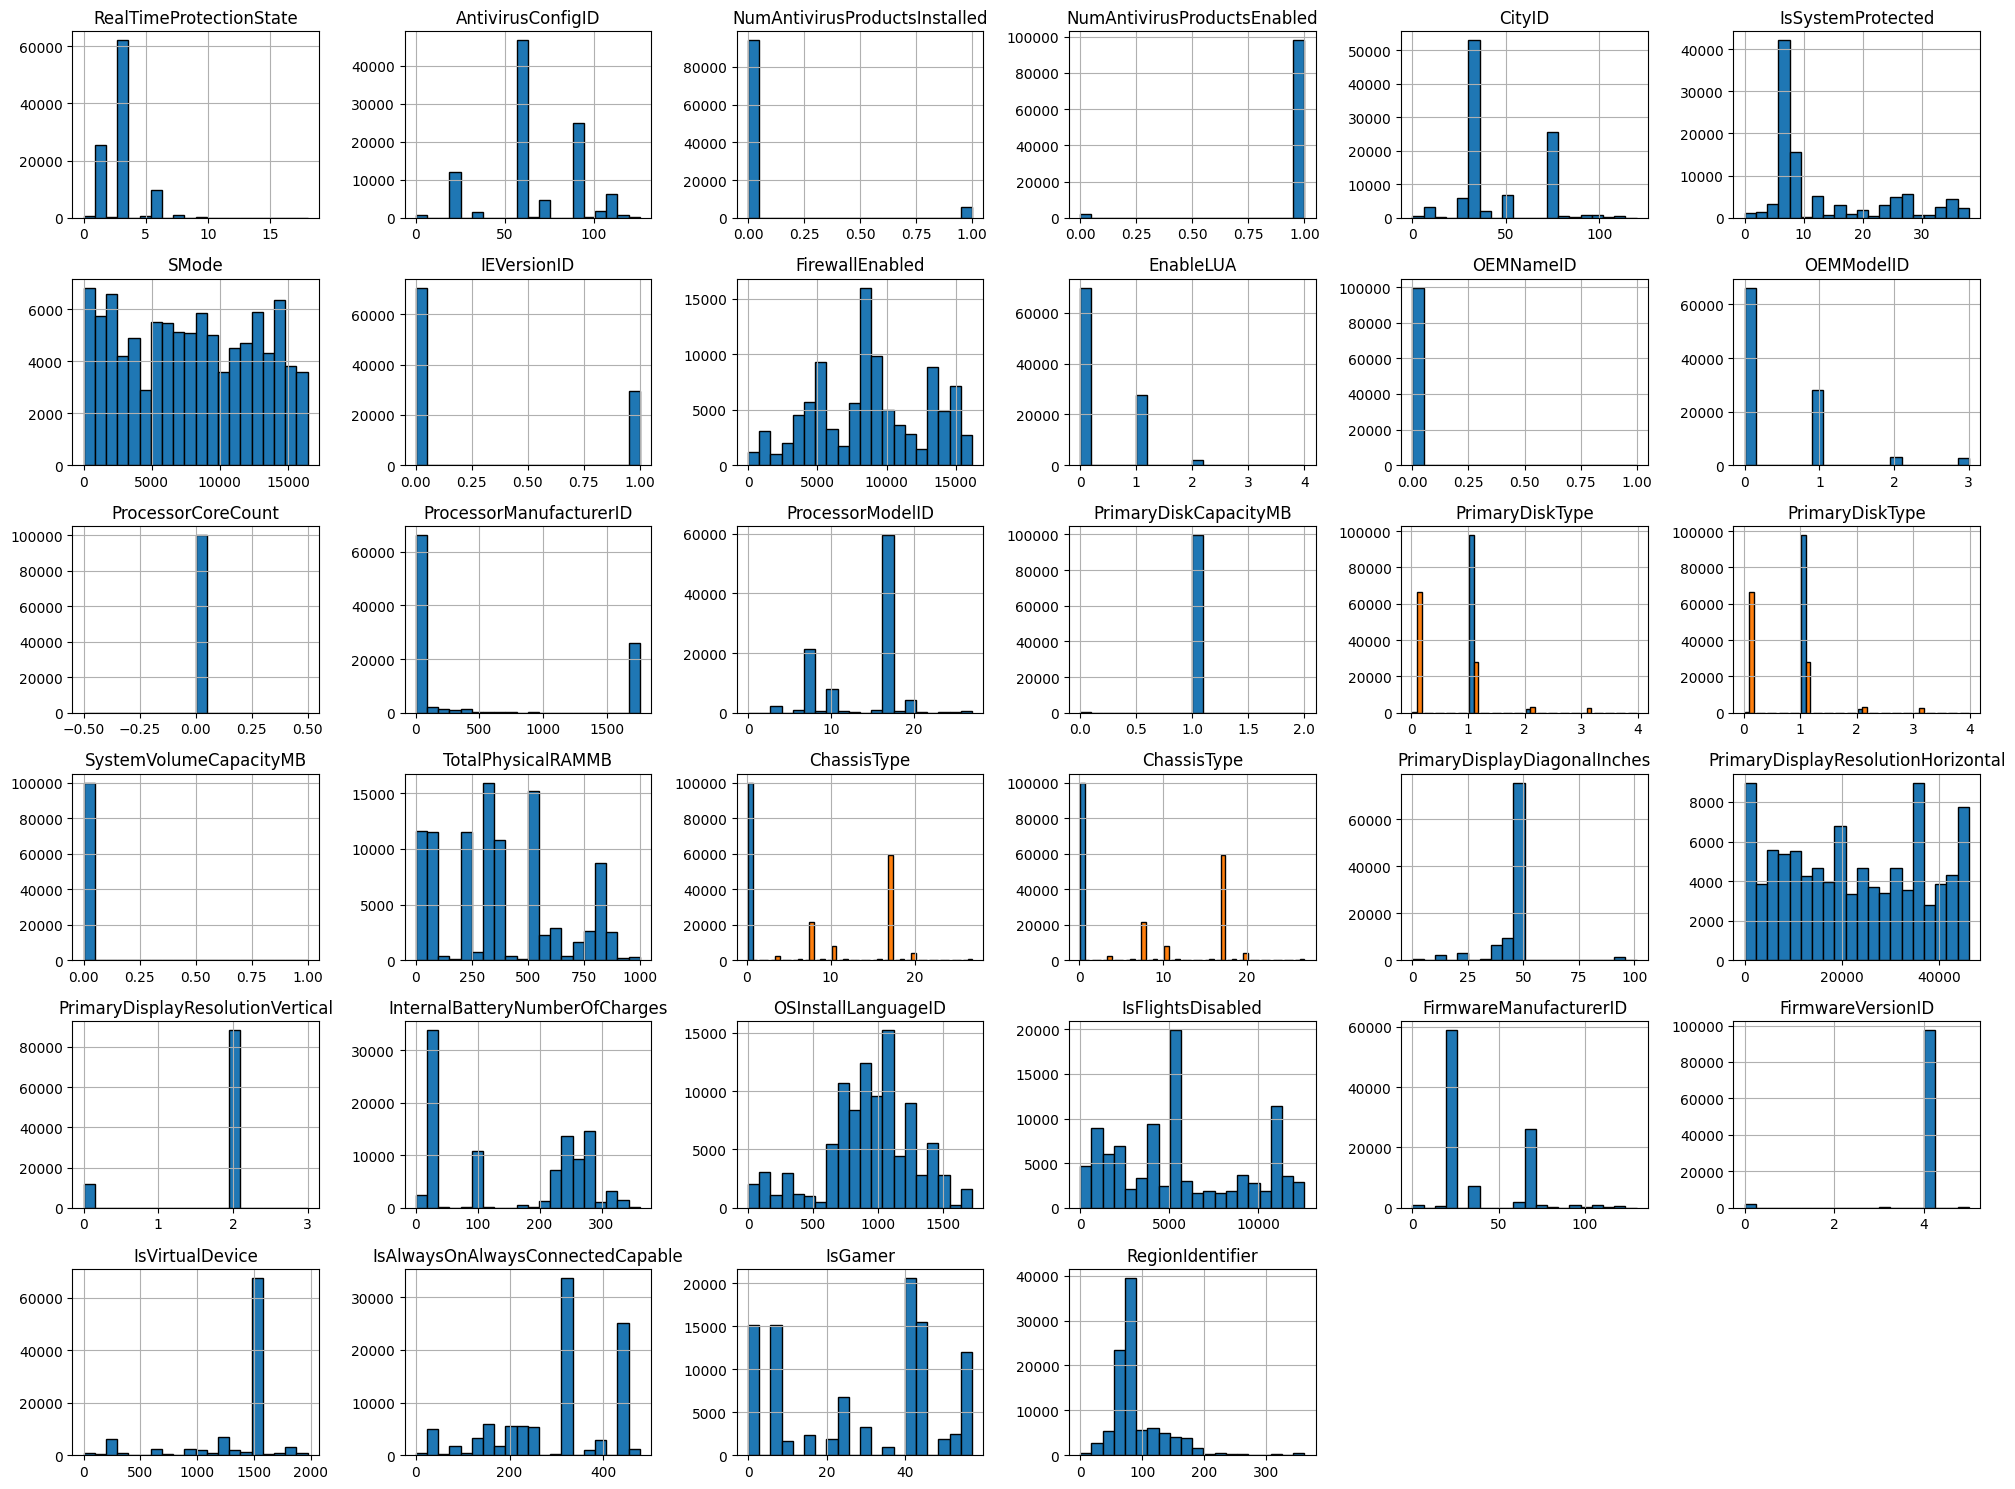

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your columns
columns = ['RealTimeProtectionState', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'CityID', 'IsSystemProtected', 'SMode', 'IEVersionID',
       'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'TotalPhysicalRAMMB', 'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSInstallLanguageID', 'IsFlightsDisabled', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier']

# Plot histograms for all specified columns
processed_df[columns].hist(bins=20, figsize=(20, 15), edgecolor='black')

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

mode = [
    'SMode', 'IsGamer', 'InternalBatteryNumberOfCharges', 'IsFlightsDisabled',
    'FirewallEnabled', 'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable',
    'OSInstallLanguageID', 'SystemVolumeCapacityMB', 'IEVersionID', 'ProcessorManufacturerID',
    'ProcessorCoreCount', 'NumAntivirusProductsEnabled', 'AntivirusConfigID',
    'NumAntivirusProductsInstalled', 'IsSystemProtected', 'PrimaryDisplayResolutionHorizontal',
    'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical',
    'RealTimeProtectionState', 'PrimaryDiskType', 'IsVirtualDevice', 'EnableLUA', 'ChassisType'
]

knn = [
    'CityID', 'RegionIdentifier', 'FirmwareManufacturerID', 'FirmwareVersionID',
    'OEMModelID', 'OEMNameID', 'PrimaryDiskCapacityMB', 'ProcessorModelID'
]

binary = ['ProductName', 'DeviceFamily']

nominal = [
    'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'ChassisType', 'PowerPlatformRole',
    'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
    'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
    'FlightRing', 'PrimaryDiskType'
]

ordinal = ['EngineVersion', 'AppVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease']

ignore = ['MachineID', 'SignatureVersion', 'OSBuildLab', 'NumericalOSVersion', 'DateAS', 'DateOS']

# Drop ignored columns
df = df.drop(columns=ignore, errors='ignore')  # Use errors='ignore' to avoid KeyErrors

# Define column transformer (Replaced OneHotEncoder with OrdinalEncoder)
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_imputer', KNNImputer(n_neighbors=5), knn),
        ('mode_imputer', SimpleImputer(strategy='most_frequent'), mode),
        ('binary_encoder', OrdinalEncoder(), binary),   # Using OrdinalEncoder instead of OneHotEncoder
        ('nominal_encoder', OrdinalEncoder(), nominal), # Using OrdinalEncoder instead of OneHotEncoder
        ('ordinal_encoder', OrdinalEncoder(), ordinal)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform
processed_data = pipeline.fit_transform(df)

# Collect correct column names after transformation
new_column_names = mode + knn + binary + nominal + ordinal + list(df.drop(columns=mode + knn + binary + nominal + ordinal, errors='ignore').columns)

# Create DataFrame with correct column names
processed_df = pd.DataFrame(processed_data, columns=new_column_names)

print(processed_df.head())


      SMode IsGamer InternalBatteryNumberOfCharges IsFlightsDisabled  \
0  120232.0     6.0                          513.0           21964.0   
1  112854.0    10.0                          628.0           44548.0   
2   41759.0     6.0                          142.0            9414.0   
3   19507.0    12.0                          554.0           33060.0   
4  117801.0     7.0                          628.0           13224.0   

  FirewallEnabled TotalPhysicalRAMMB IsAlwaysOnAlwaysConnectedCapable  \
0        330367.0              561.0                          15028.0   
1         25212.0             2668.0                         953869.0   
2        263666.0             3035.0                         228936.0   
3        242491.0             2102.0                        1907729.0   
4        257309.0             2668.0                         305245.0   

  OSInstallLanguageID SystemVolumeCapacityMB IEVersionID  \
0              1850.0                    0.0         0.0   
1       

In [15]:
# Check if any columns are still categorical
print("Columns with string values:", processed_df.select_dtypes(include=['object']).columns)

# Apply Ordinal Encoding to any remaining categorical columns
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = processed_df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    processed_df[categorical_cols] = encoder.fit_transform(processed_df[categorical_cols])

# Ensure all values are numeric
print("Updated Data Types:\n", processed_df.dtypes)


Columns with string values: Index(['SMode', 'IsGamer', 'InternalBatteryNumberOfCharges',
       'IsFlightsDisabled', 'FirewallEnabled', 'TotalPhysicalRAMMB',
       'IsAlwaysOnAlwaysConnectedCapable', 'OSInstallLanguageID',
       'SystemVolumeCapacityMB', 'IEVersionID', 'ProcessorManufacturerID',
       'ProcessorCoreCount', 'NumAntivirusProductsEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'IsSystemProtected', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionVertical',
       'RealTimeProtectionState', 'PrimaryDiskType', 'IsVirtualDevice',
       'EnableLUA', 'ChassisType', 'CityID', 'RegionIdentifier',
       'FirmwareManufacturerID', 'FirmwareVersionID', 'OEMModelID',
       'OEMNameID', 'PrimaryDiskCapacityMB', 'ProcessorModelID', 'ProductName',
       'DeviceFamily', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily',
       'ChassisType', 'PowerPlatformRole', 'OSArchitecture', 'OSBranch',
      

In [16]:
processed_df.head()

,SMode,IsGamer,InternalBatteryNumberOfCharges,IsFlightsDisabled,FirewallEnabled,TotalPhysicalRAMMB,IsAlwaysOnAlwaysConnectedCapable,OSInstallLanguageID,SystemVolumeCapacityMB,IEVersionID,ProcessorManufacturerID,ProcessorCoreCount,NumAntivirusProductsEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,IsSystemProtected,PrimaryDisplayResolutionHorizontal,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionVertical,RealTimeProtectionState,PrimaryDiskType,IsVirtualDevice,EnableLUA,ChassisType,CityID,RegionIdentifier,FirmwareManufacturerID,FirmwareVersionID,OEMModelID,OEMNameID,PrimaryDiskCapacityMB,ProcessorModelID,ProductName,DeviceFamily,SKUEditionName,MDC2FormFactor,DeviceFamily,ChassisType,PowerPlatformRole,OSArchitecture,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,PrimaryDiskType,EngineVersion,AppVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,IsBetaUser,IsPassiveModeEnabled,HasTpm,CountryID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,AutoSampleSubmissionEnabled,HasOpticalDiskDrive,NumericOSVersion,OSBuildNumberOnly,OSBuildRevisionOnly,OSUILocaleID,IsPortableOS,IsSecureBootEnabled,IsTouchEnabled,IsPenCapable,target
0,11836.0,20.0,226.0,4127.0,15111.0,54.0,8.0,618.0,0.0,0.0,142.0,0.0,1.0,4.0,1.0,4.0,30.0,40.0,2.0,3.0,1.0,1497.0,0.0,1.0,5.0,13.0,78.0,4.0,1.0,0.0,1.0,17.0,1.0,0.0,4.0,10.0,0.0,17.0,6.0,2.0,0.0,1.0,1.0,7.0,5.0,1.0,2.0,3.0,1.0,34.0,31.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,50.0,79.0,83.0,4.0,5.0,0.0,0.0,93.0,2.0,149.0,10.0,0.0,0.0,1.0,0.0,0.0
1,11053.0,40.0,282.0,7578.0,619.0,506.0,432.0,908.0,0.0,0.0,1759.0,0.0,1.0,60.0,0.0,8.0,45026.0,50.0,2.0,3.0,1.0,1497.0,0.0,1.0,49.0,123.0,34.0,4.0,0.0,0.0,1.0,3.0,1.0,0.0,6.0,0.0,0.0,3.0,1.0,0.0,5.0,11.0,12.0,6.0,2.0,1.0,0.0,3.0,0.0,33.0,31.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,140.0,138.0,157.0,7.0,1.0,0.0,1.0,194.0,7.0,40.0,16.0,0.0,1.0,0.0,0.0,1.0
2,3992.0,20.0,23.0,1562.0,10296.0,580.0,196.0,1098.0,0.0,1.0,1759.0,0.0,1.0,93.0,0.0,4.0,17335.0,50.0,2.0,3.0,1.0,1497.0,0.0,1.0,74.0,169.0,70.0,4.0,1.0,0.0,1.0,7.0,1.0,0.0,4.0,2.0,0.0,7.0,1.0,0.0,5.0,1.0,1.0,5.0,2.0,1.0,1.0,3.0,1.0,34.0,31.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,50.0,79.0,83.0,7.0,5.0,0.0,1.0,196.0,7.0,45.0,10.0,0.0,0.0,0.0,0.0,1.0
3,1884.0,50.0,252.0,5447.0,8596.0,337.0,464.0,1452.0,0.0,0.0,0.0,0.0,1.0,93.0,0.0,6.0,45837.0,45.0,2.0,3.0,1.0,1194.0,1.0,1.0,35.0,85.0,21.0,4.0,0.0,0.0,1.0,17.0,1.0,0.0,4.0,7.0,0.0,17.0,3.0,0.0,1.0,1.0,1.0,8.0,5.0,1.0,0.0,3.0,0.0,34.0,17.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,67.0,223.0,57.0,5.0,5.0,0.0,0.0,155.0,4.0,96.0,13.0,0.0,1.0,0.0,0.0,1.0
4,11599.0,25.0,282.0,2406.0,9530.0,506.0,245.0,1699.0,0.0,1.0,1759.0,0.0,1.0,21.0,0.0,36.0,1804.0,50.0,2.0,1.0,1.0,947.0,1.0,1.0,49.0,129.0,34.0,4.0,0.0,0.0,1.0,7.0,1.0,0.0,6.0,2.0,0.0,7.0,1.0,2.0,5.0,11.0,12.0,6.0,2.0,1.0,2.0,3.0,0.0,34.0,22.0,0.0,2.0,0.0,4.0,0.0,0.0,1.0,42.0,44.0,29.0,7.0,1.0,0.0,0.0,196.0,7.0,45.0,59.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
X=processed_df.drop('target',axis=1)
y=processed_df['target']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")

# Classification Report & Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Decision Tree Model Accuracy: 0.5496
Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.54      0.54      9878
         1.0       0.55      0.56      0.56     10122

    accuracy                           0.55     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.55      0.55      0.55     20000

Confusion Matrix:
 [[5354 4524]
 [4483 5639]]
